<a href="https://colab.research.google.com/github/gigikenneth/time-series/blob/main/ts1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_path = 'Cleaned_data.csv'

air = pd.read_csv(data_path)

In [ ]:
air.head()

,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,date,time,day_of_month,month,year,days_of_week,day_in_week,weekdays_end,hour,AM_PM,Air_quality
0,198,89,50,40.78,2021-07-26,16:45:59,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy
1,199,89,50,40.09,2021-07-26,16:48:03,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy
2,200,89,50,37.93,2021-07-26,16:49:59,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy
3,201,89,50,33.18,2021-07-26,16:54:03,26,July,2021,0,Monday,Weekdays,16,PM,Moderate
4,202,89,50,37.84,2021-07-26,16:55:59,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy


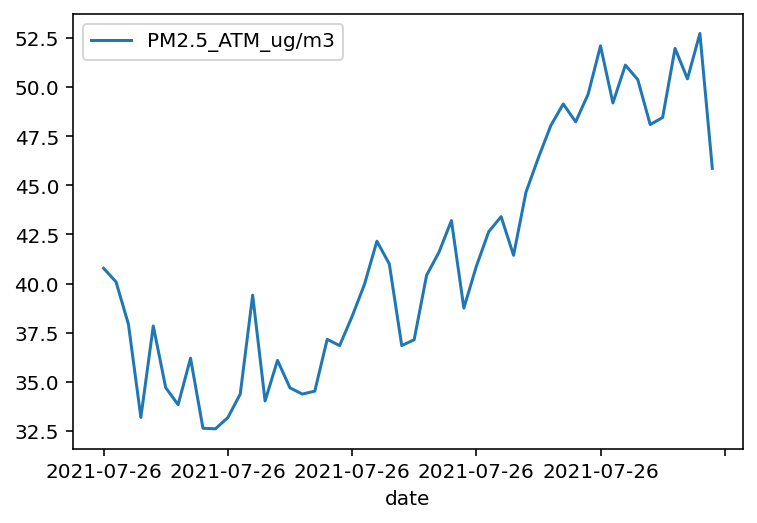

In [ ]:
air[:5*10].plot(x='date', y='PM2.5_ATM_ug/m3')

In [ ]:
data = air

In [ ]:
# displaying the datatypes
display(data.dtypes)
  

  
# displaying the datatypes
#display(df.dtypes)

entry_id             int64
Temperature_F      float64
Humidity_%         float64
PM2.5_ATM_ug/m3    float64
date                object
time                object
day_of_month         int64
month               object
year                 int64
days_of_week         int64
day_in_week         object
weekdays_end        object
hour                 int64
AM_PM               object
Air_quality         object
dtype: object

In [ ]:
# converting 'PM2.5_ATM_ug/m3' from float to int
data['PM2.5_ATM_ug/m3'] = data['PM2.5_ATM_ug/m3'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# displaying the datatypes
display(data.dtypes)

entry_id             int64
Temperature_F      float64
Humidity_%         float64
PM2.5_ATM_ug/m3      int64
date                object
time                object
day_of_month         int64
month               object
year                 int64
days_of_week         int64
day_in_week         object
weekdays_end        object
hour                 int64
AM_PM               object
Air_quality         object
dtype: object

In [ ]:
quant_features = ['Temperature_F', 'Humidity_%', 'PM2.5_ATM_ug/m3']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
# Save data for approximately the last 10 days 
test_data = data[-10*24:]

# Now remove the test data from the data set 
data = data[:-10*24]

# Separate the data into features and targets
target_fields = ['Temperature_F', 'Humidity_%', 'PM2.5_ATM_ug/m3']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [ ]:
# Hold out the last 30 days or so of the remaining data as a validation set
train_features, train_targets = features[:-30*24], targets[:-30*24]
val_features, val_targets = features[-30*24:], targets[-30*24:]

In [ ]:
#import neural net
from my_answers import NeuralNetwork

In [ ]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [ ]:
#unit tests
import unittest

inputs = np.array([[0.5, -0.2, 0.1]])
targets = np.array([[0.4]])
test_w_i_h = np.array([[0.1, -0.2],
                       [0.4, 0.5],
                       [-0.3, 0.2]])
test_w_h_o = np.array([[0.3],
                       [-0.1]])

class TestMethods(unittest.TestCase):
    
    ##########
    # Unit tests for data loading
    ##########
    
    def test_data_path(self):
        # Test that file path to dataset has been unaltered
        self.assertTrue(data_path.lower() == 'Cleaned_data.csv')
        
    def test_data_loaded(self):
        # Test that data frame loaded
        self.assertTrue(isinstance(rides, pd.DataFrame))
    
    ##########
    # Unit tests for network functionality
    ##########

    def test_activation(self):
        network = NeuralNetwork(3, 2, 1, 0.5)
        # Test that the activation function is a sigmoid
        self.assertTrue(np.all(network.activation_function(0.5) == 1/(1+np.exp(-0.5))))

    def test_train(self):
        # Test that weights are updated correctly on training
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()
        
        network.train(inputs, targets)
        self.assertTrue(np.allclose(network.weights_hidden_to_output, 
                                    np.array([[ 0.37275328], 
                                              [-0.03172939]])))
        self.assertTrue(np.allclose(network.weights_input_to_hidden,
                                    np.array([[ 0.10562014, -0.20185996], 
                                              [0.39775194, 0.50074398], 
                                              [-0.29887597, 0.19962801]])))

    def test_run(self):
        # Test correctness of run method
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()

        self.assertTrue(np.allclose(network.run(inputs), 0.09998924))

suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner().run(suite)

..F..
FAIL: test_data_path (__main__.TestMethods)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-41-e8e73eef4c84>", line 20, in test_data_path
    self.assertTrue(data_path.lower() == 'Cleaned_data.csv')
AssertionError: False is not true

----------------------------------------------------------------------
Ran 5 tests in 0.014s

FAILED (failures=1)


<unittest.runner.TextTestResult run=5 errors=0 failures=1>

In [ ]:
from my_answers import iterations, learning_rate, hidden_nodes, output_nodes


N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    X, y = train_features.loc[batch].values, train_targets.loc[batch]['PM2.5_ATM_ug/m3']
                             
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features).T, train_targets['PM2.5_ATM_ug/m3'].values)
    val_loss = MSE(network.run(val_features).T, val_targets['PM2.5_ATM_ug/m3'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

TypeError: ignored